## Movement time

Examine how the model predicts movement times for different distances.

In [1]:
from gazetools import *

In [71]:
data = pd.read_csv('output/behaviour_trace.csv')
data

,step,reward,done,target_width,target_x,target_y,fixation_x,fixation_y,episode
0,0,0.000000,False,0.15,-0.005797,-0.293959,-1.000000,-1.000000,0
1,1,-0.296028,False,0.15,-0.005797,-0.293959,-0.014563,0.001939,0
2,2,0.000000,True,0.15,-0.005797,-0.293959,-0.001897,-0.298669,0
3,0,0.000000,False,0.15,-0.372173,0.601522,-1.000000,-1.000000,1
4,1,-0.698794,False,0.15,-0.372173,0.601522,-0.018058,-0.000903,1
...,...,...,...,...,...,...,...,...,...
3214,3,-0.093249,False,0.15,0.555035,-0.728006,0.515211,-0.643689,998
3215,4,0.000000,True,0.15,0.555035,-0.728006,0.582491,-0.722611,998
3216,0,0.000000,False,0.15,0.530559,-0.103241,-1.000000,-1.000000,999
3217,1,-0.559748,False,0.15,0.530559,-0.103241,-0.022162,-0.014826,999


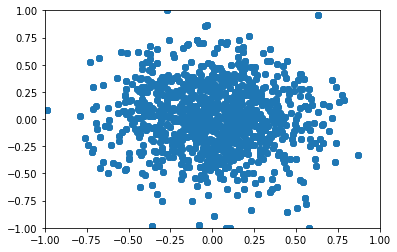

In [72]:

x = data['target_x']
y = data['target_y']
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(x,y)

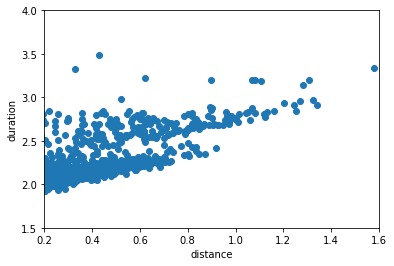

In [79]:
def calc_all_move_durations(data):
    n = max(data['episode']) + 1
    result = []
    for eps in range(n):
        # each episode
        df_eps=data.loc[data['episode']==eps]
        df_eps.reset_index(drop=True, inplace=True)
        d = move_duration(df_eps)
        # the distance of the target from (0,0)
        t = np.sqrt( (df_eps['target_x'][0] - df_eps['target_y'][0])**2 )
        out = {'move_distance':d, 'target_distance':t}
        result.append(out)
    r = pd.DataFrame(result)
    return r

def move_duration(data):
    ''' calculate the move duration for an episode.
        Assumes that param data contains a single row for each fixation in the episode and no other rows.
    '''
    n = data.shape[0]
    result = 0
    x0 = data['fixation_x'][0]
    y0 = data['fixation_y'][0]    
    for step in range(1,n):
        x1 = data['fixation_x'][step]
        y1 = data['fixation_y'][step]
        # calculate the Euclidean distance for the saccade between two fixations.
        dist = np.sqrt((x0-x1)**2 + (y0-y1)**2)
        x0 = x1
        y0 = y1
        fix_duration = 0.2
        result = result + dist + fix_duration
    return result

dist = calc_all_move_durations(data)

x = dist['target_distance']
y = dist['move_distance']
plt.ylim(1.5,4)
plt.xlim(0.2,1.6)
plt.xlabel('distance')
plt.ylabel('duration')
plt.scatter(x,y)